# Тест детектора YOLO на COCO датасете

1.  Download YOLO-NAS from [SuperGradients](https://github.com/Deci-AI/super-gradients/) , use the faster [model](https://github.com/Deci-AI/super-gradients/blob/master/YOLONAS.md).
2. Check model on arbitrary image.
3. Install [pycocotools](https://github.com/cocodataset/cocoapi.git)
5. Load first five images with bicycles from COCO dataset
6. Perform object detection only for bycycle class using YOLO.
7. Display ground true and detected bounding boxes on images. Use red color for YOLO bounding boxes and green for ground true.


##  Download YOLO


Create model instance. [models](https://github.com/Deci-AI/super-gradients/blob/master/YOLONAS.md)

In [1]:
import super_gradients.training.models

yolo = super_gradients.training.models.get("yolo_nas_l", pretrained_weights = "coco")

[2024-02-15 12:17:57] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-02-15 12:17:57] WARNING - __init__.py - Failed to import pytorch_quantization
[2024-02-15 12:17:57,625] torch.distributed.elastic.multiprocessing.redirects: [WARNING] NOTE: Redirects are currently not supported in Windows or MacOs.


The console stream is logged into /Users/ttpo100ajiex/sg_logs/console.log


[2024-02-15 12:17:59] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-02-15 12:17:59] WARNING - export.py - Failed to import pytorch_quantization
[2024-02-15 12:17:59] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2024-02-15 12:17:59] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.
[2024-02-15 12:18:00] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-02-15 12:18:00] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


## Smoke test

Test model on arbitrary image

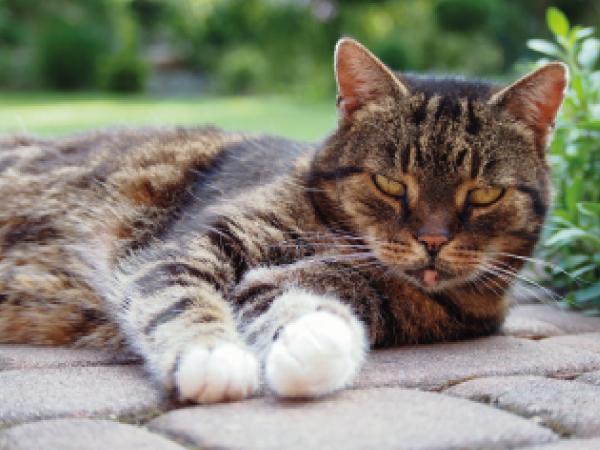

In [2]:
from PIL import Image

! wget -qO cat.png https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/Exercises/EX11/semantic_segmentation.png

img = Image.open("cat.png")
display(img)

/opt/homebrew/lib/python3.10/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
[2024-02-15 12:18:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


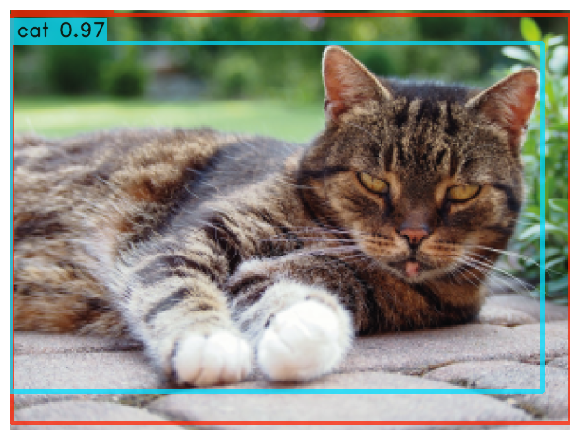

In [3]:
yolo.predict(img).show()

## Load the data

Load first five images with bicycles from COCO dataset

*  Use [pycocotools](https://github.com/cocodataset/cocoapi.git)
*  Display loaded images

In [4]:
! wget -c http://images.cocodataset.org/annotations/annotations_trainval2017.zip
! unzip -o annotations_trainval2017.zip

from pycocotools.coco import COCO

coco = COCO('./annotations/instances_val2017.json')

--2024-02-15 12:18:02--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.110.51, 52.217.134.17, 3.5.25.130, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.110.51|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  
loading annotations into memory...


In [5]:
catIds = coco.getCatIds(catNms = [ 'bicycle' ])
imgIds = coco.getImgIds(catIds = catIds)[:6]
imgIds

[184324, 546823, 343561, 169996, 277005, 549390]

In [6]:
images = coco.loadImgs(imgIds)
images

[{'license': 4,
  'file_name': '000000184324.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000184324.jpg',
  'height': 425,
  'width': 640,
  'date_captured': '2013-11-17 05:31:28',
  'flickr_url': 'http://farm4.staticflickr.com/3568/3364389746_361655c747_z.jpg',
  'id': 184324},
 {'license': 2,
  'file_name': '000000546823.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000546823.jpg',
  'height': 480,
  'width': 640,
  'date_captured': '2013-11-18 20:39:29',
  'flickr_url': 'http://farm3.staticflickr.com/2336/2346306710_d25a24fda5_z.jpg',
  'id': 546823},
 {'license': 3,
  'file_name': '000000343561.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000343561.jpg',
  'height': 428,
  'width': 640,
  'date_captured': '2013-11-15 04:22:48',
  'flickr_url': 'http://farm5.staticflickr.com/4118/4812500977_6b1c83b5c4_z.jpg',
  'id': 343561},
 {'license': 6,
  'file_name': '000000169996.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/00000

In [7]:
import tqdm
import requests
from io import BytesIO

imgs = [ ]
for image in tqdm.tqdm(images):
    response = requests.get(image['coco_url'])
    imgs.append(Image.open(BytesIO(response.content)))

Done (t=0.35s)
creating index...
index created!


 83%|████████▎ | 5/6 [00:04<00:00,  1.23it/s]

100%|██████████| 6/6 [00:04<00:00,  1.26it/s]


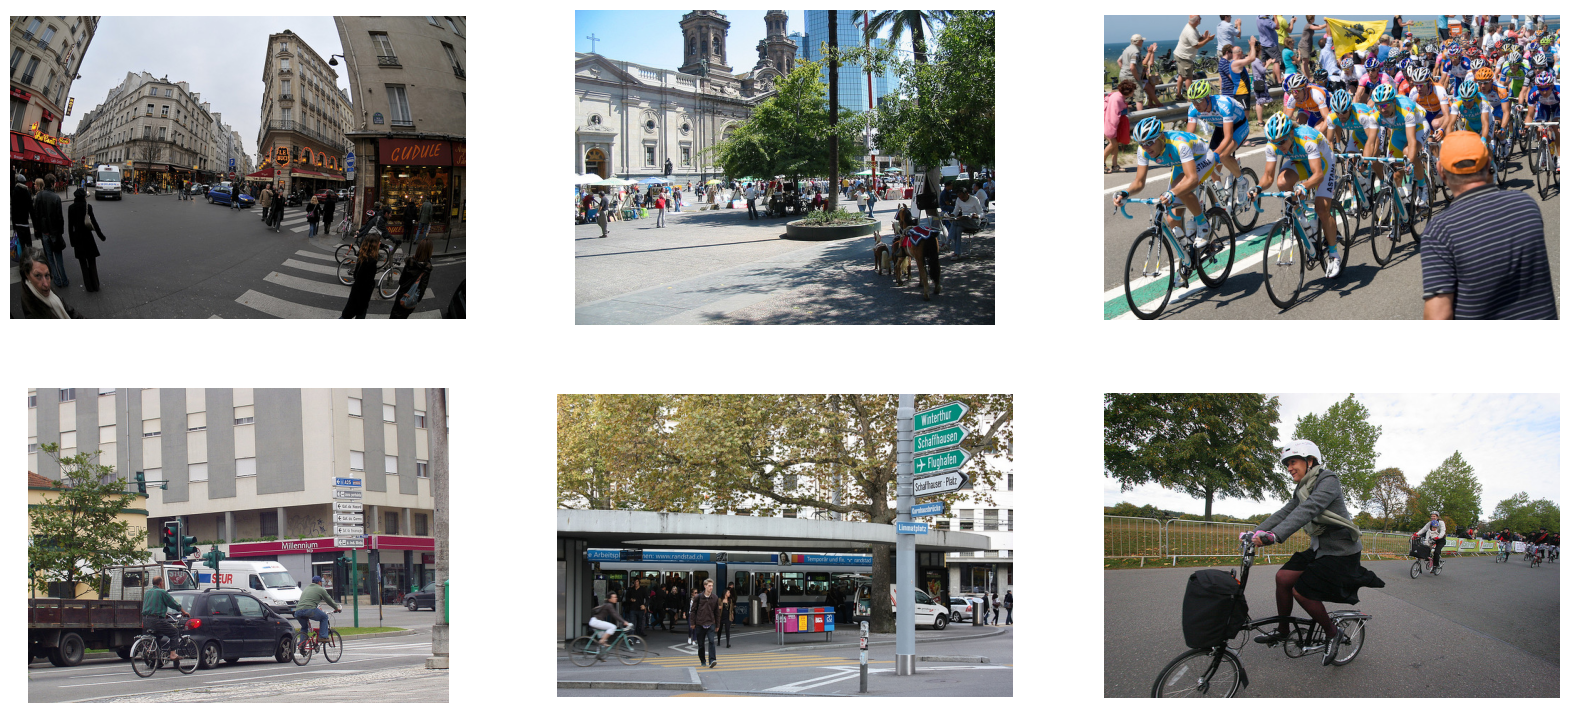

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize = (20, 9))
for img, ax in zip(imgs, axes.flat):
    ax.axis(False)
    ax.imshow(img)

## Detection

Detect bicycles in downloaded images using YOLO.

Display ground true and detected bounding boxes on images. Use red for YOLO bounding boxes and green for ground true.

https://pytorch.org/vision/stable/utils.html

The resulting images should look as follows:

 <img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/Exercises/EX11/result_4_task_ex11.png" width="400">


[2024-02-15 12:18:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


[2024-02-15 12:18:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-02-15 12:18:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-02-15 12:18:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-02-15 12:18:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-02-15 12:18:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


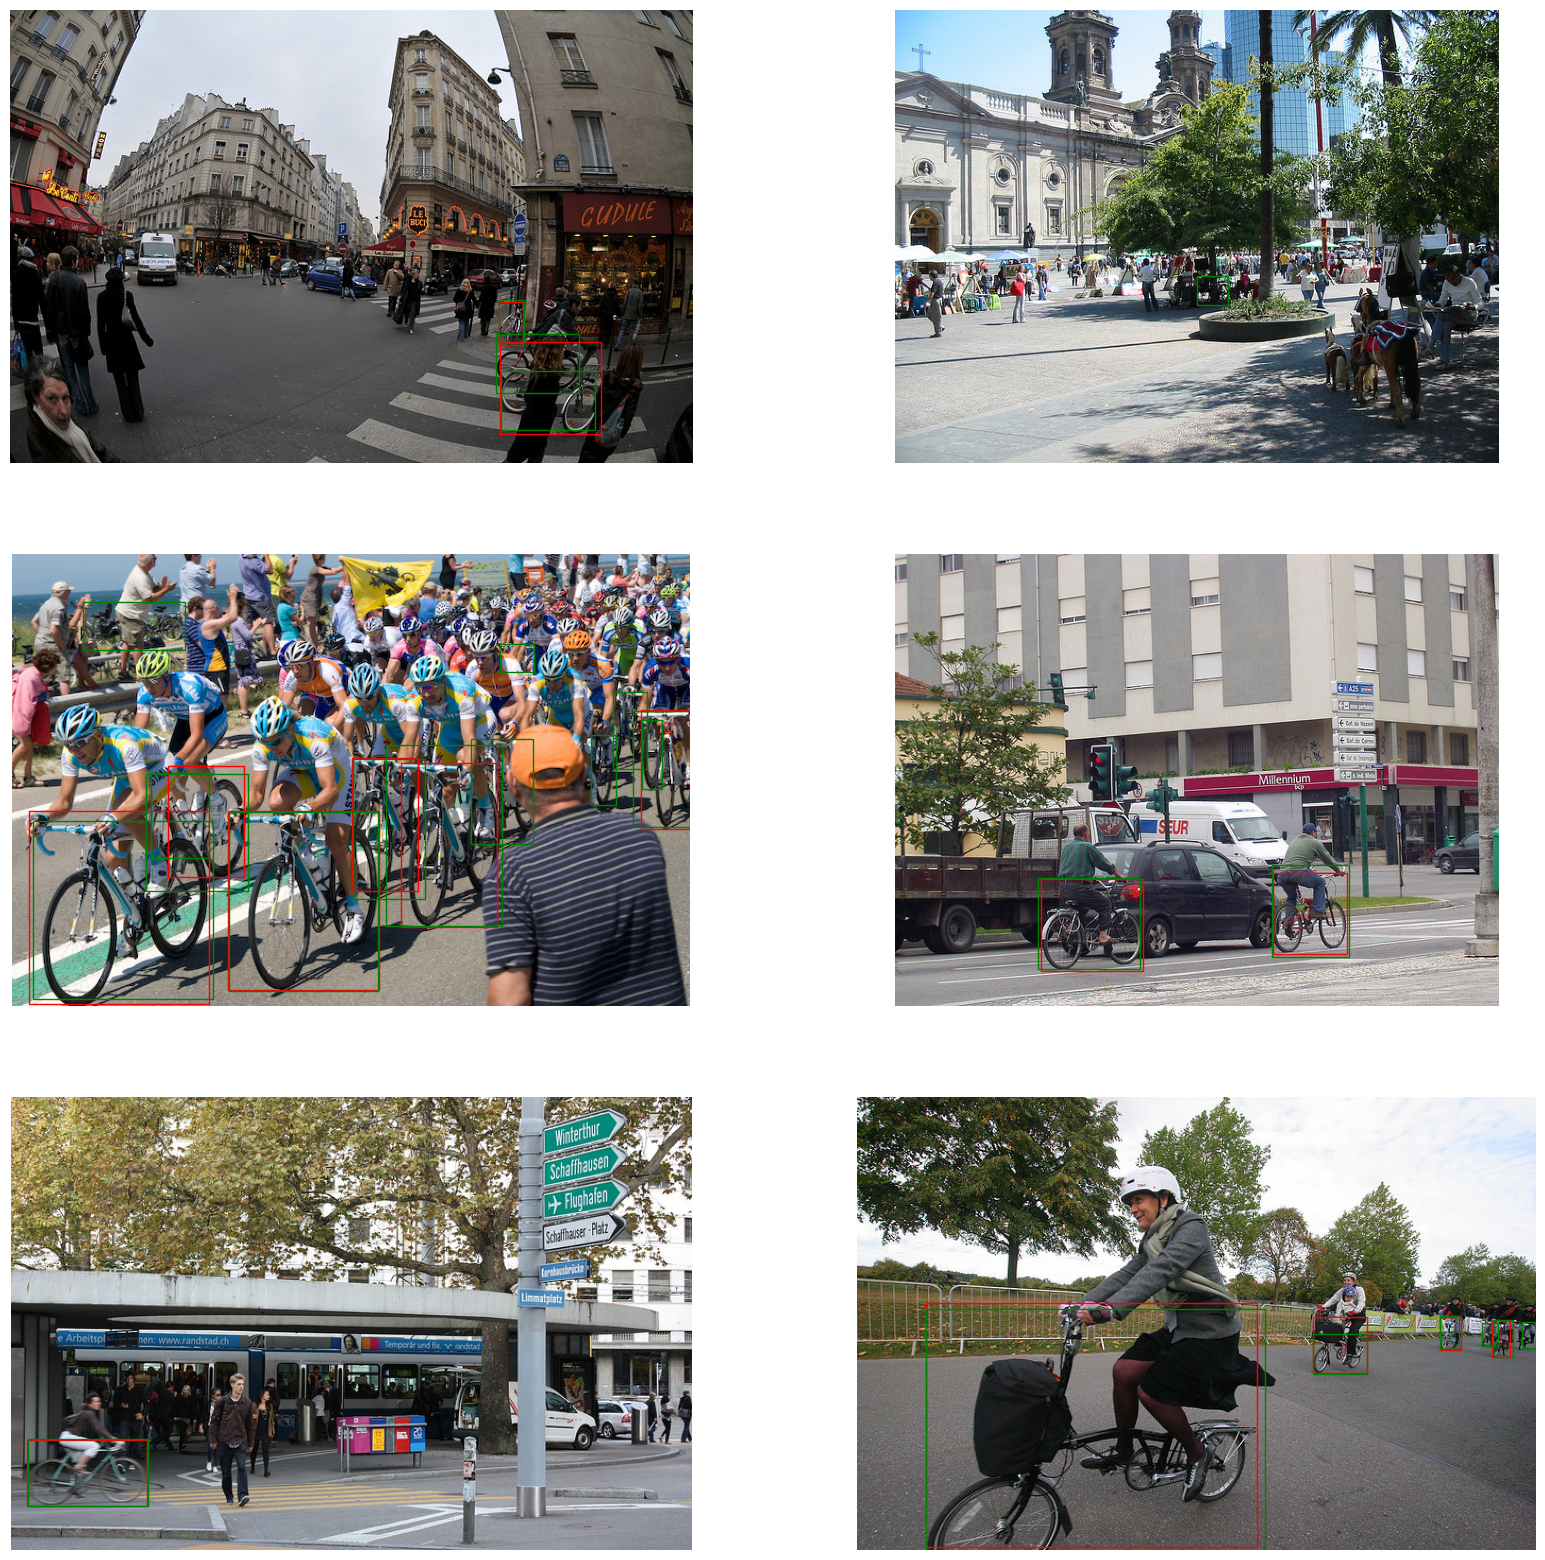

In [9]:
import matplotlib.patches as ptchs

fig, axes = plt.subplots(3, 2, figsize = (20, 20))
for img, imgId, ax in zip(imgs, imgIds, axes.flat):
    ax.axis(False)
    ax.imshow(img)

    pred = yolo.predict(img)
    for bbox, confidence, label in zip(pred.prediction.bboxes_xyxy, pred.prediction.confidence, pred.prediction.labels):
        if pred.class_names[label] != 'bicycle' or confidence < 0.5: continue
        xmin, ymin, xmax, ymax = bbox
        rect = ptchs.Rectangle(
            (xmin, ymin), xmax - xmin, ymax - ymin,
            linewidth = 1, edgecolor = 'red', facecolor = 'none'
        )
        ax.add_patch(rect)

    for obj in coco.imgToAnns[imgId]:
        bbox = obj['bbox']
        label = obj['category_id']
        if coco.loadCats(ids = [ label ])[0]['name'] != 'bicycle': continue
        rect = ptchs.Rectangle(
            (bbox[0], bbox[1]), bbox[2], bbox[3],
            linewidth = 1, edgecolor = 'green', facecolor = 'none'
        )
        ax.add_patch(rect)

## Ideas for extra work


* Calculate mAP metric for bicycle detection. You can use [cocoEval.evaluate](https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocotools/cocoeval.py) or [Torchmetrics](https://torchmetrics.readthedocs.io/en/stable/).
* Use open vocabulary free detector like [OWLv2](https://huggingface.co/docs/transformers/model_doc/owlv2) and compare it mAP with YOLO's